# Árboles de decisión

## Example: Iris

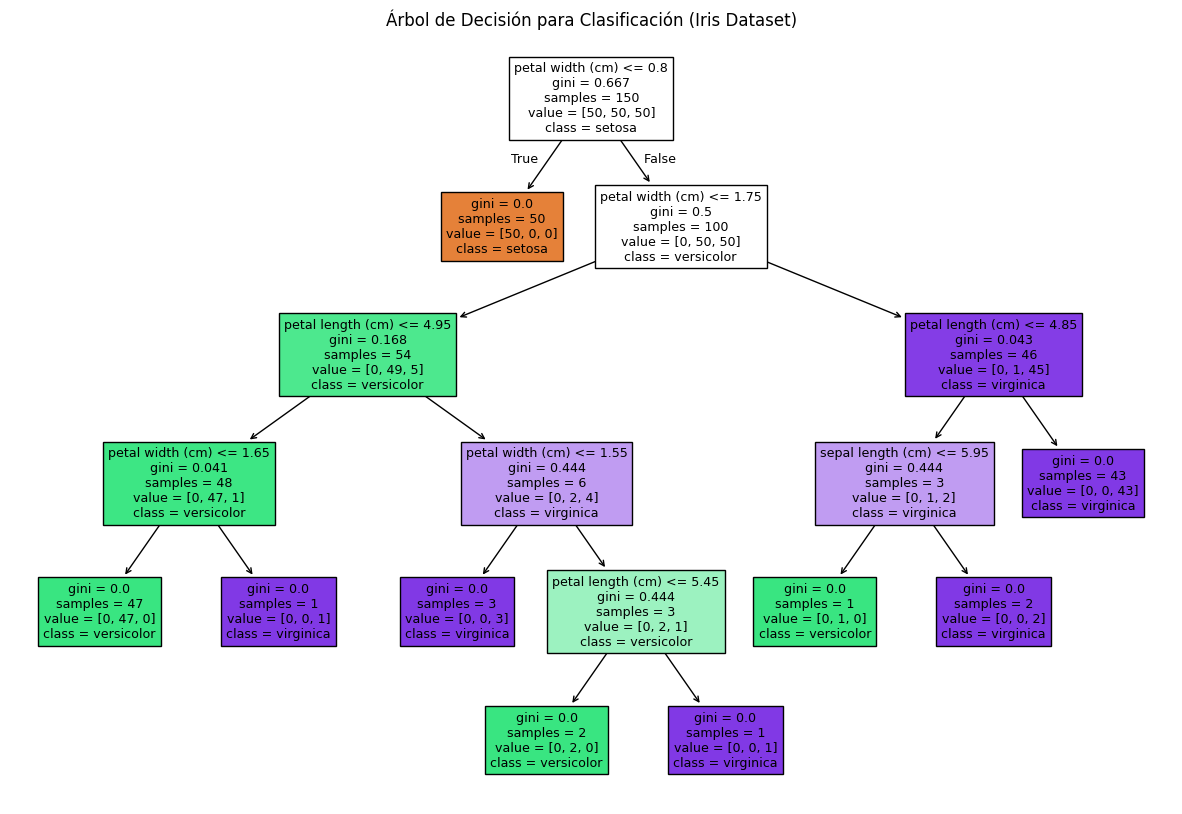

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Crear un clasificador de árbol de decisión para clasificación
clf_classification = DecisionTreeClassifier()
clf_classification.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(
    clf_classification,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
)
plt.title("Árbol de Decisión para Clasificación (Iris Dataset)")
plt.show()

Accuracy: 0.9666666666666667

Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



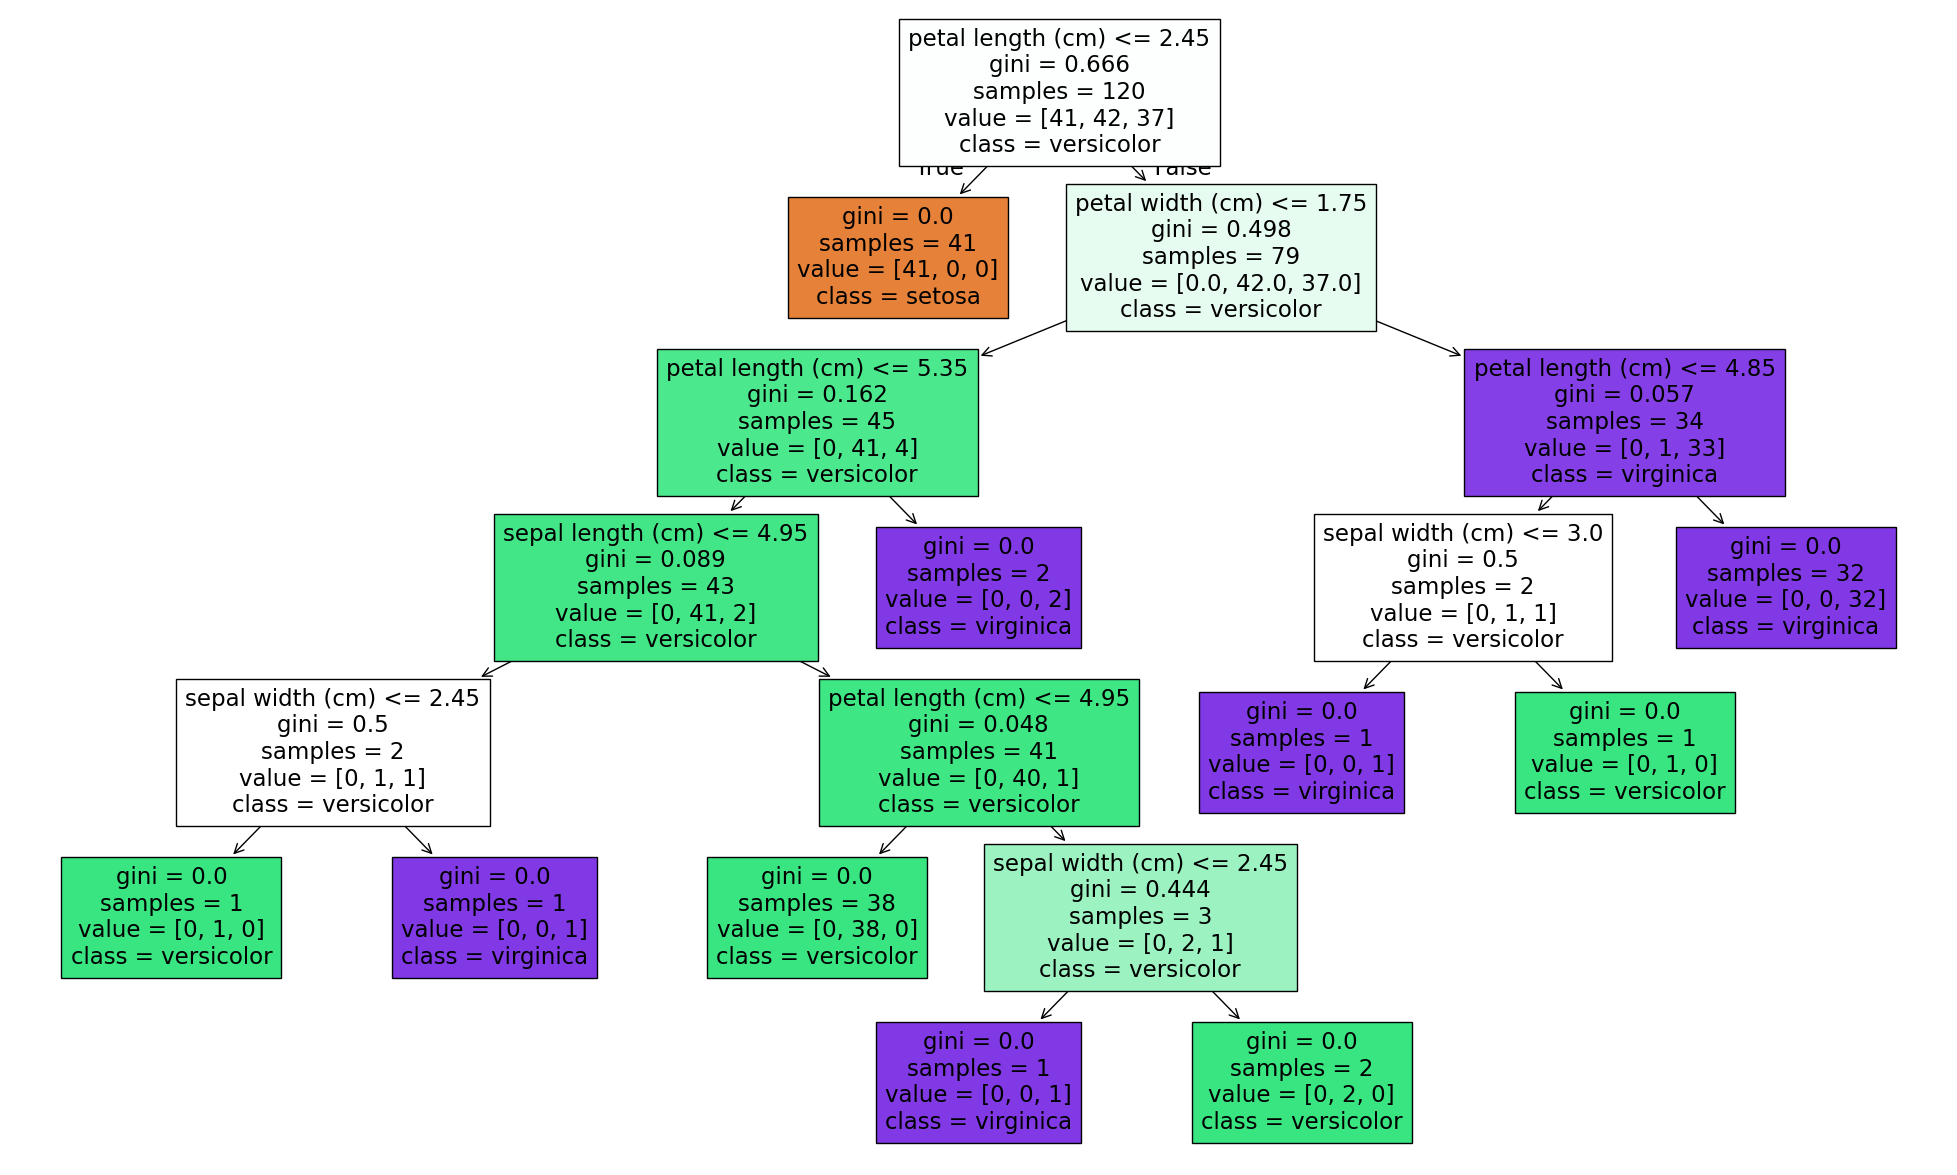

[1]


In [2]:
#Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#Cargar dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
#Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
#Crear y entrenar el árbol
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)
#Hacer predicciones
y_pred = modelo.predict(X_test)
#Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
#Visualizar el árbol de decisión
plt.figure(figsize=(25, 15))
plot_tree(modelo, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()
#Pronóstico
y_Pron = modelo.predict(X_test)
W=[5.8,2.8,4.0,1.2]
W_Test=modelo.predict([W])
print(W_Test)



## Example: Titanic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   ParCh     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB
Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 4}
Mejor puntuación de validación cruzada:
0.7935016835016835
El accuracy en train es: 0.8226691042047533
El accuracy en test es: 0.8394160583941606


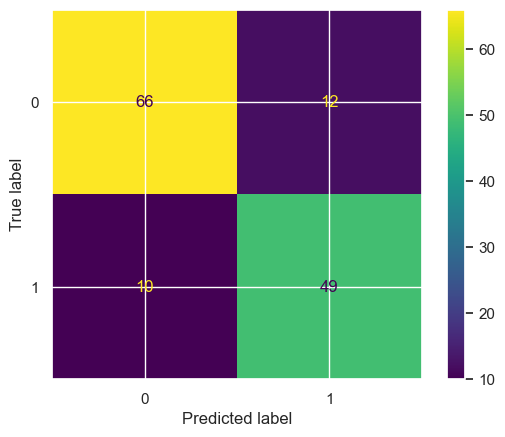

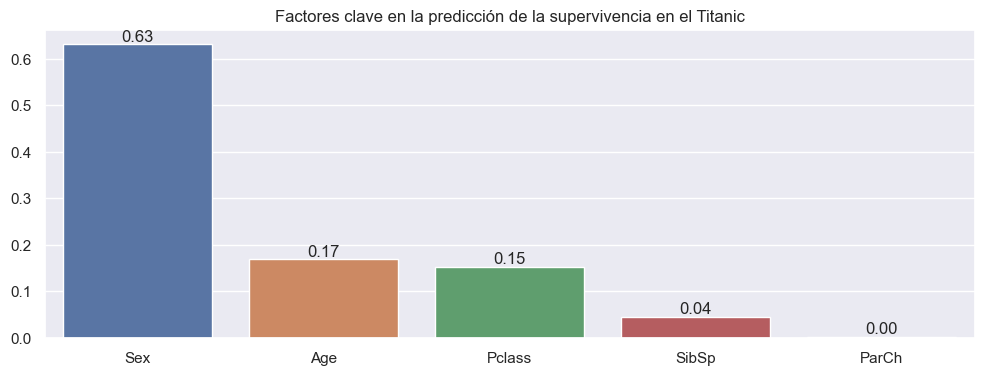

y_Pron=array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1])
W_Test=array([1])


c:\Users\samaf\OneDrive - UNIR\Documents\Studies\Unir\Ingeniería Informática\07 - Sistemas Inteligentes\intelligence-systems-exercises-unir\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


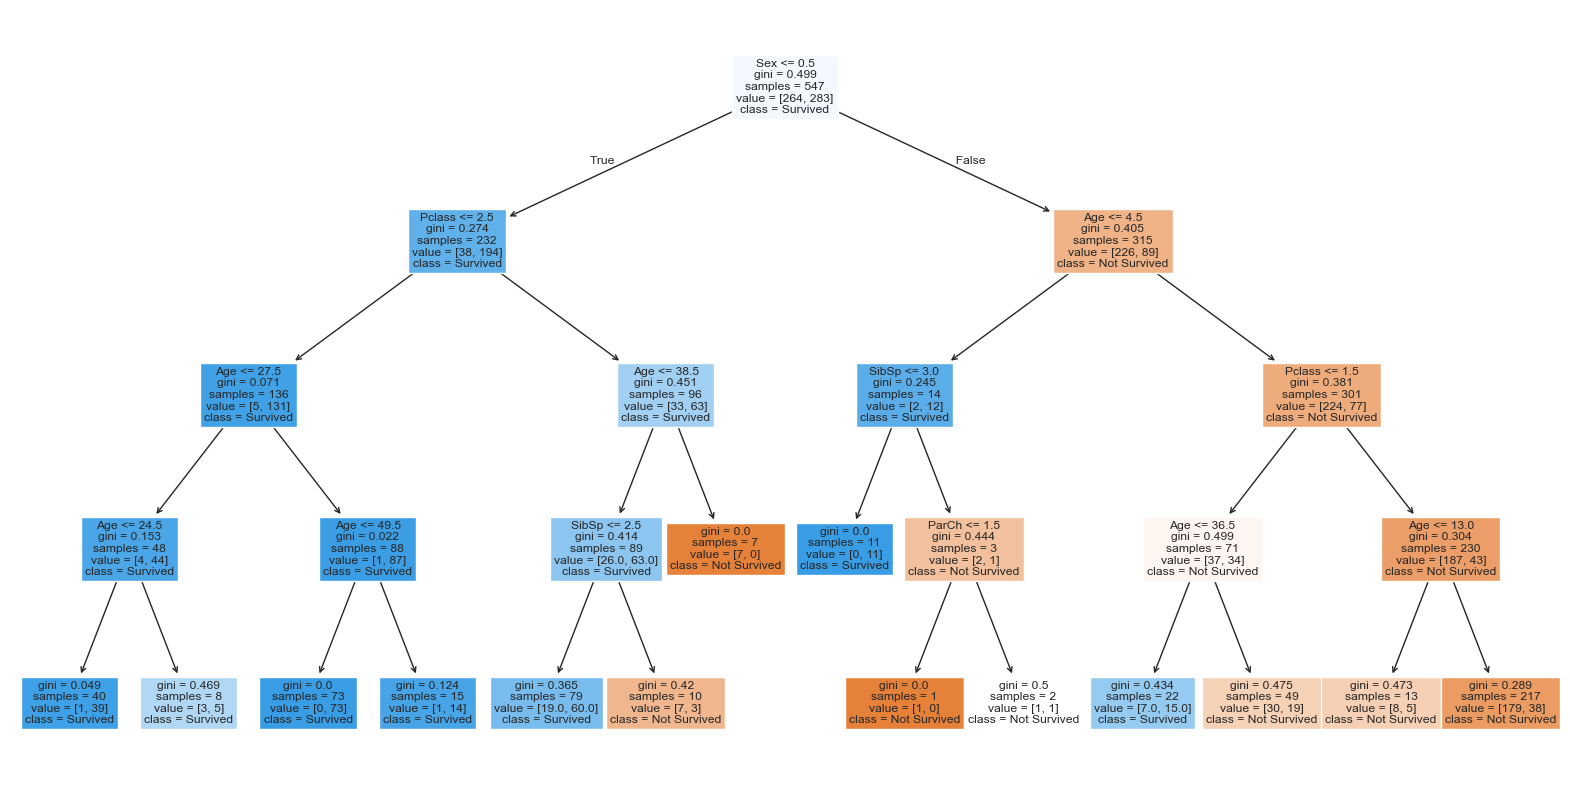

In [6]:
# Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="notebook")

# carga del conjunto de datos
titanic = pd.read_csv("../resources/titanic.csv", sep=",")

# mirar encabezado con los datos
titanic.head(10)

# Eliminamos las columnas que no nos interesan
titanic.drop(["Name", "Fare"], axis=1, inplace=True)

# mirar encabezado con los datos sin las columnas eliminadas
titanic.head(10)

# Renombramos las columnas Siblings/Spouses Aboard      y Parents/Children Aboard por SibSp y ParCh
titanic.columns = ["Survived", "Pclass", "Sex", "Age", "SibSp", "ParCh"]
titanic.head()

# Analizamos el shape del objeto
titanic.shape

# Visualizamos los tipos de datos
titanic.info()

# Cambiamos los tipos de datos de Sex
titanic = pd.get_dummies(titanic, columns=["Sex"], drop_first=True)

titanic.dtypes

titanic.head()

# Renombramos columna Sex_male a Sex
titanic.rename(columns={"Sex_male": "Sex"}, inplace=True)

# Ordenar colummas por nombres
titanic = titanic[["Survived", "Pclass", "Sex", "Age", "SibSp", "ParCh"]]
titanic

# Vemos la proporcion del a variable objetivo
titanic.Survived.value_counts(normalize=True)

# importamos libreria para balancear los datos
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)

# Separamos en X e y
X_titanic = titanic.drop("Survived", axis=1)
y_titanic = titanic.Survived

# Balanceamos los datos
X_over_titanic, y_over_titanic = undersample.fit_resample(X_titanic, y_titanic)
y_over_titanic.value_counts(normalize=True)

# Importamos las librerias para dividir el dataset
from sklearn.model_selection import train_test_split

# 30% para test y 70% para train
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    X_over_titanic, y_over_titanic, test_size=0.20, random_state=42
)

# Importamos las librerias para la creacion del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)
param_grid = {"criterion": ["gini", "entropy"], "max_depth": [4]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_titanic, y_train_titanic)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

# Pronosticamos Y
y_train_pred_titanic = best_clf.predict(X_train_titanic)
y_test_pred_titanic = best_clf.predict(X_test_titanic)

# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_titanic, y_test_pred_titanic, labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()

# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train_titanic)
y_test_pred = best_clf.predict(X_test_titanic)

from sklearn.metrics import accuracy_score

print("El accuracy en train es:", accuracy_score(y_train_titanic, y_train_pred_titanic))
print("El accuracy en test es:", accuracy_score(y_test_titanic, y_test_pred_titanic))

feature_scores_titanic = pd.DataFrame(
    pd.Series(
        grid_search.best_estimator_.feature_importances_, index=X_train_titanic.columns
    ).sort_values(ascending=False)
).T

plt.figure(figsize=(12, 4))
sns.barplot(data=feature_scores_titanic)

for index, value in enumerate(feature_scores_titanic.values.flatten()):
    plt.annotate(f"{value:.2f}", xy=(index, value), ha="center", va="bottom")


plt.title("Factores clave en la predicción de la supervivencia en el Titanic")
plt.show()

# Graficar el árbol
X_names = X_train_titanic.columns
y_names = ["Not Survived", "Survived"]
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
_ = tree.plot_tree(best_clf, feature_names=X_names, class_names=y_names, filled=True)
# plt.figure(figsize=(15,10))
# tree.plot_tree(best_clf,filled=True)
# plt.show()


# Pronóstico

y_Pron = best_clf.predict(X_test_titanic)
print(f"{y_Pron=}")
W = [1, 0, 35, 0, 0]
W_Test = best_clf.predict([W])
print(f"{W_Test=}")

## Example: Cars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
        PRICE
       Freq[N]  Prop[%]
price                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
***********************
        MAINT
       Freq[N]  Prop[%]
maint                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
***********************
        DOORS
       Freq[N]  Prop[%]
doors                  
2          432     0.25
3          432     0.25
4          432     0.25
5more      43

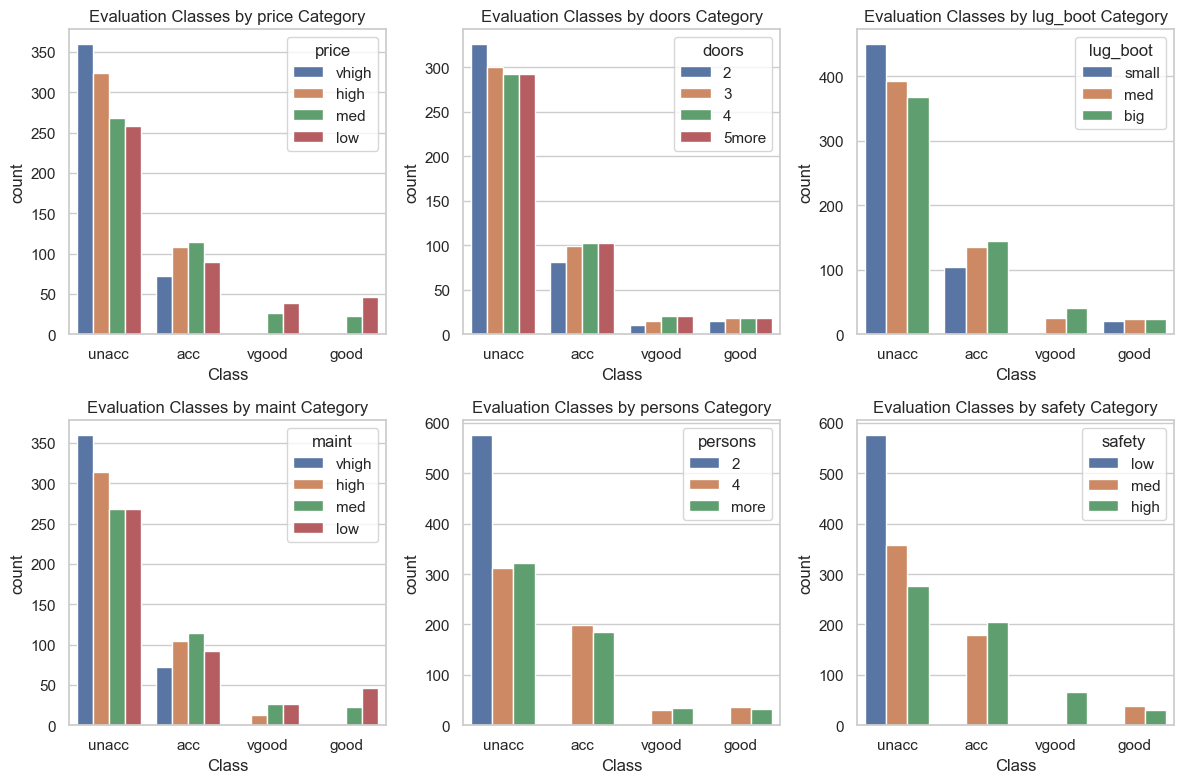

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


X: (182, 6) (78, 6)
y: (182,) (78,)
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 4}
Mejor puntuación de validación cruzada:
0.8026315789473685
El accuracy en train es: 0.717948717948718
El accuracy en test es: 0.8131868131868132
              precision    recall  f1-score   support

         acc       0.77      0.62      0.69        16
        good       0.65      0.48      0.55        23
       unacc       1.00      0.80      0.89        20
       vgood       0.59      1.00      0.75        19

    accuracy                           0.72        78
   macro avg       0.75      0.73      0.72        78
weighted avg       0.75      0.72      0.71        78



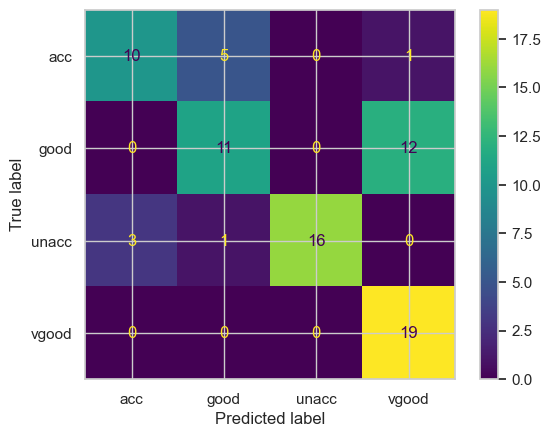

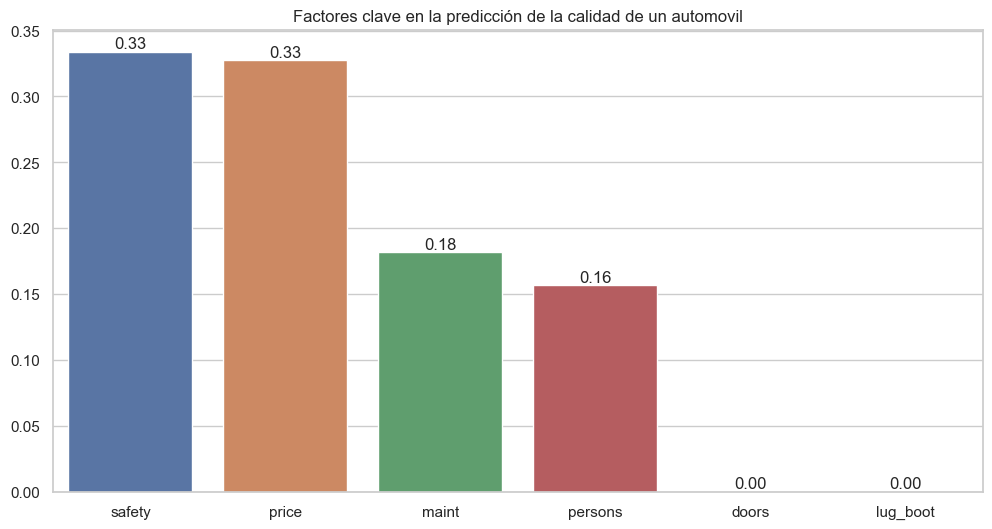

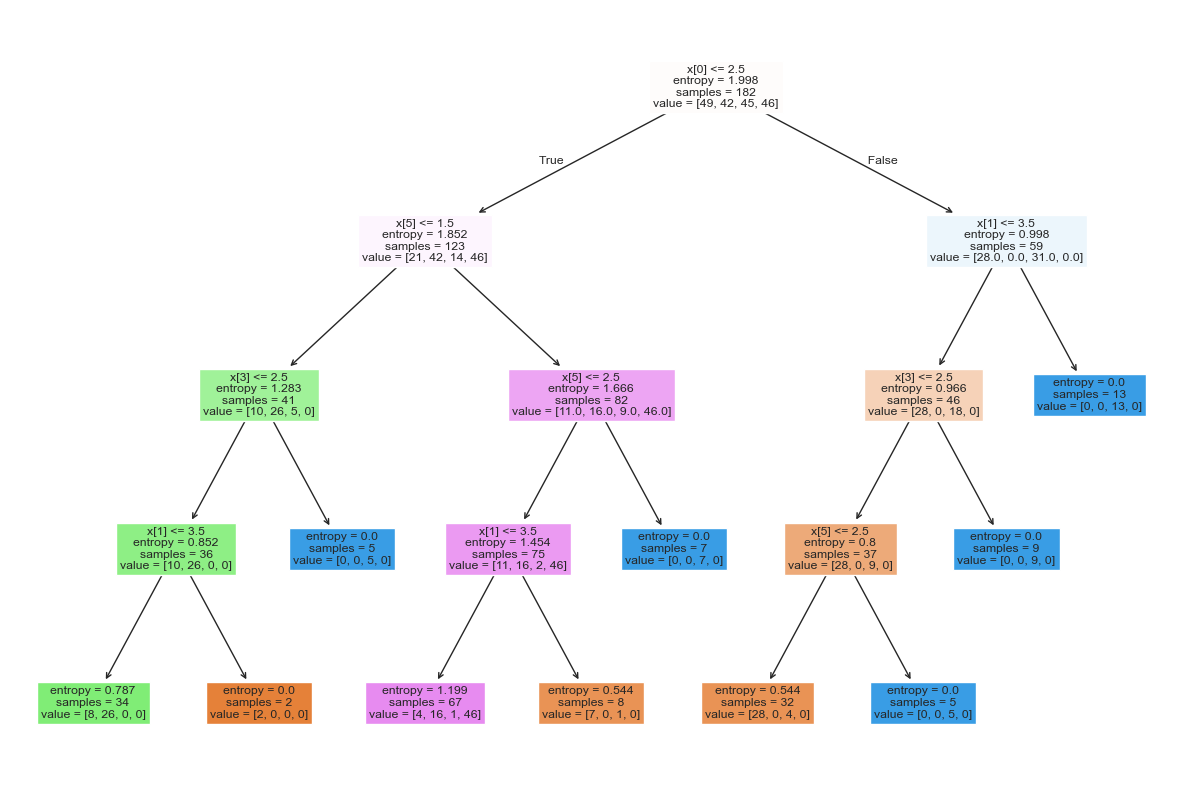

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

df_car = pd.read_csv('../resources/car_evaluation.csv', header=None)

columns_names = ['price','maint','doors','persons','lug_boot','safety','Class']

df_car.columns = columns_names

#mirar encabezado con los datos
df_car.head(10)

# Visualizacion del shape del DF
df_car.shape

# Tipos de datos
df_car.info()

# Vereificamos valores missings
df_car.isnull().sum()

#datos duplicados
df_car.drop_duplicates()

#manejo de datos nulos
df_car.isnull().sum()

# Funcion conteo y proporcion de datos
def dist(df,target):
    count= df[target].value_counts(normalize=False)
    prop = df[target].value_counts(normalize=True)

    dist = pd.DataFrame({'Freq[N]':count,'Prop[%]':prop.round(3)})
    return dist

    # Ver el conteo y la proporción de Class 
for i in columns_names:
    print(' '*7,i.upper())
    print(dist(df_car,i))
    print("*"*23)


# Graficamos la variable Class separada por los distintos atributos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, variable in enumerate(columns_names[:-1]):
    row = i % 2
    col = i // 2
    sns.countplot(data=df_car, x='Class',hue=variable, ax=axes[row][col])
    axes[row][col].set_title(f"Evaluation Classes by {variable} Category")

plt.tight_layout()
plt.show()

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)

# Separamos datos por X e Y
X_car = df_car.drop('Class',axis=1)
y_car = df_car.Class

# Se realiza el undersampling
X_car, y_car = undersample.fit_resample(X_car,y_car)

import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=columns_names[:-1])

X_car = encoder.fit_transform(X_car)

X_car.head()

X_car.dtypes

from sklearn.model_selection import train_test_split

X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X_car,y_car,test_size=0.3, random_state=42)

print('X:',X_train_car.shape, X_test_car.shape)
print('y:',y_train_car.shape, y_test_car.shape)


from sklearn.tree import DecisionTreeClassifier

# Instancia del modelo
tree_car = DecisionTreeClassifier(random_state=42)


from sklearn.model_selection import GridSearchCV

# parametros del decision tree
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(tree_car, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_car, y_train_car)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

# Modelo decision tree con parametros optimizados
best_tree_car = grid_search.best_estimator_

# Predecimos Y
y_train_pred_tree_car = best_tree_car.predict(X_train_car)
y_test_pred_tree_car = best_tree_car.predict(X_test_car)

# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test_car,y_test_pred_tree_car,labels=best_tree_car.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_tree_car.classes_).plot()

from sklearn.metrics import accuracy_score, classification_report

# Calculo el accuract en train 
train_acc = accuracy_score(y_true=y_test_car,y_pred=y_test_pred_tree_car)
# Calculo el accuract en test 
test_acc  = accuracy_score(y_true=y_train_car,y_pred=y_train_pred_tree_car)

print("El accuracy en train es:",train_acc)
print("El accuracy en test es:",test_acc)

print(classification_report(y_test_car,y_test_pred_tree_car))

feature_scores_car = pd.DataFrame(pd.Series(best_tree_car.feature_importances_, index=X_train_car.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_car)

for index, value in enumerate(feature_scores_car.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la calidad de un automovil")
plt.show()
pd.DataFrame(feature_scores_car.T)

#Graficar el árbol
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(best_tree_car,filled=True)
plt.show()

In [11]:
# Haz una predicción de un automóvil
# Opción 1: Usar el encoder para transformar los valores categóricos
W_original = pd.DataFrame([['vhigh', 'vhigh', '2', '2', 'small', 'low']], 
                           columns=['price', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
W_encoded = encoder.transform(W_original)
W_Test = best_tree_car.predict(W_encoded)
print(f"Predicción con valores categóricos: {W_Test}")

# Opción 2: Ver el mapeo del encoder para entender los valores numéricos
print(f"\nMapeo del encoder:")
print(encoder.mapping)

# Opción 3: Usar valores numéricos directamente (si conoces el mapeo)
# W_numeric = [[valor1, valor2, valor3, valor4, valor5, valor6]]
# W_Test_numeric = best_tree_car.predict(W_numeric)
# print(f"Predicción con valores numéricos: {W_Test_numeric}")

Predicción con valores categóricos: ['unacc']

Mapeo del encoder:
[{'col': 'price', 'mapping': med      1
low      2
vhigh    3
high     4
NaN     -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'maint', 'mapping': med      1
high     2
low      3
vhigh    4
NaN     -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'doors', 'mapping': 3        1
5more    2
4        3
2        4
NaN     -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'persons', 'mapping': more    1
4       2
2       3
NaN    -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'lug_boot', 'mapping': big      1
small    2
med      3
NaN     -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'safety', 'mapping': med     1
high    2
low     3
NaN    -2
dtype: int64, 'data_type': dtype('O')}]
